In [1]:
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
import XSpect.XSpect_PostProcessing
import XSpect.XSpect_Diagnostics
import numpy as np
import matplotlib.pyplot as plt

## Timing Overlap example using XAS Data

(-1.0, 5.0)

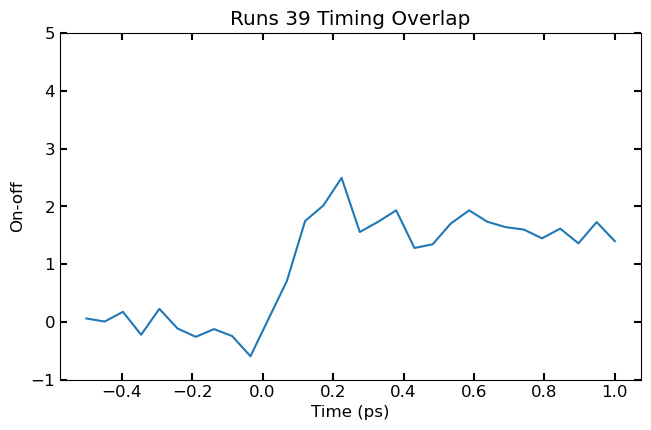

In [2]:

xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.XASBatchAnalysis_1D_time()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.run_parser(['123']) # 7.5 uJ -0.5 to 2 ps
xas.mintime = -0.5
xas.maxtime = 1
(xas.maxtime-xas.mintime)/0.05
xas.numpoints = int((xas.maxtime-xas.mintime)/0.05)
xas.primary_analysis_loop(xas_experiment)
for idx,run in enumerate(xas.analyzed_runs):
    if idx==0:
        on=run.epix_simultaneous_laser_time_binned/run.ipm_simultaneous_laser_time_binned
        off=run.epix_xray_not_laser_time_binned/run.ipm_xray_not_laser_time_binned
    else:
        on=on+run.epix_simultaneous_laser_time_binned/run.ipm_simultaneous_laser_time_binned
        off=off+run.epix_xray_not_laser_time_binned/run.ipm_xray_not_laser_time_binned
diff=on-off
plt.plot(xas.time_bins,(on-off)[:-1])
plt.title('Runs 39 Timing Overlap')
plt.xlabel('Time (ps)')
plt.ylabel('On-off')
plt.ylim(-1,5)

## Laser Overlap at 1E-6 S example using XAS Data

Obtained shot properties
HDF5 import of keys completed. Time: 0.00 seconds
Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser
Shots (3590) separated for detector epix on filters: xray and laser into epix_xray_laser
Shots combined for detector ipm on filters: simultaneous and laser into ipm_simultaneous_laser
Shots (3590) separated for detector ipm on filters: xray and laser into ipm_xray_laser
Shots combined for detector scan on filters: simultaneous and laser into scan_simultaneous_laser
Shots (3590) separated for detector scan on filters: xray and laser into scan_xray_laser
Shots combined for detector scanvar_indices on filters: simultaneous and laser into scanvar_indices_simultaneous_laser
Shots (3590) separated for detector scanvar_indices on filters: xray and laser into scanvar_indices_xray_laser
Detector epix_simultaneous_laser binned in energy into key: epix_simultaneous_laser_energy_binned
Detector epix_xray_not_laser binned in ener

/lscratch/lbgee/tmp/ipykernel_2133604/2471543736.py:19: RuntimeWarning: invalid value encountered in divide
  ons=laser_on/norm_on
/lscratch/lbgee/tmp/ipykernel_2133604/2471543736.py:20: RuntimeWarning: invalid value encountered in divide
  offs=laser_off/norm_off
/lscratch/lbgee/tmp/ipykernel_2133604/2471543736.py:21: RuntimeWarning: invalid value encountered in divide
  plt.plot(f.scanvar_bins,laser_on/norm_on)
/lscratch/lbgee/tmp/ipykernel_2133604/2471543736.py:22: RuntimeWarning: invalid value encountered in divide
  plt.plot(f.scanvar_bins,laser_off/norm_off)


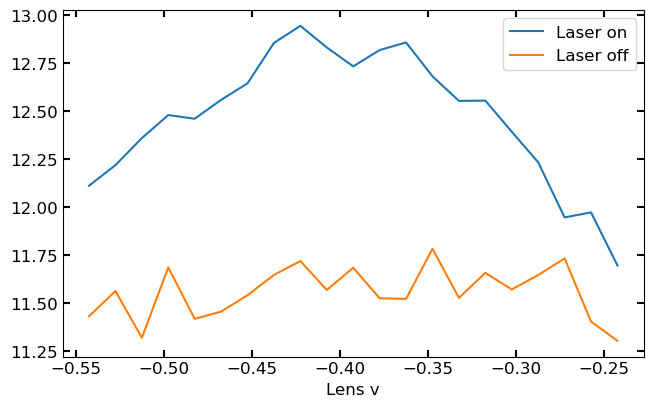

In [4]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
f=XSpect.XSpect_Analysis.spectroscopy_run(xas_experiment,run=17,verbose=True)
xas=XSpect.XSpect_Controller.ScanAnalysis_1D()
analysis=XSpect.XSpect_Analysis.XASAnalysis()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_sum','scan/var0'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix','scan']
xas.set_key_aliases(keys,names)
#xas.
#xas.add_filter('xray','ipm',500.0)
#xas.add_filter('simultaneous','ipm',500.0)
#xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['117']) # 7.5 uJ -0.5 to 2 ps
xas.primary_analysis_loop(xas_experiment)
for f in xas.analyzed_runs:
    laser_on=f.epix_simultaneous_laser_energy_binned
    laser_off=f.epix_xray_not_laser_energy_binned
    norm_on=f.ipm_simultaneous_laser_energy_binned
    norm_off=f.ipm_xray_not_laser_energy_binned
ons=laser_on/norm_on
offs=laser_off/norm_off
plt.plot(f.scanvar_bins,laser_on/norm_on)
plt.plot(f.scanvar_bins,laser_off/norm_off)
#plt.plot(f.scanvar_bins,ons-offs)

plt.xlabel('Lens v')
plt.legend(['Laser on','Laser off'])

## Power Titration using XAS Data

Obtained shot properties
HDF5 import of keys completed. Time: 0.00 seconds
Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser
Shots (8718) separated for detector epix on filters: xray and laser into epix_xray_laser
Shots combined for detector ipm on filters: simultaneous and laser into ipm_simultaneous_laser
Shots (8718) separated for detector ipm on filters: xray and laser into ipm_xray_laser
Shots combined for detector scan on filters: simultaneous and laser into scan_simultaneous_laser
Shots (8718) separated for detector scan on filters: xray and laser into scan_xray_laser
Shots combined for detector scanvar_indices on filters: simultaneous and laser into scanvar_indices_simultaneous_laser
Shots (8718) separated for detector scanvar_indices on filters: xray and laser into scanvar_indices_xray_laser
Detector epix_simultaneous_laser binned in energy into key: epix_simultaneous_laser_energy_binned
Detector epix_xray_not_laser binned in ener

/lscratch/lbgee/tmp/ipykernel_2133604/2664955254.py:19: RuntimeWarning: invalid value encountered in divide
  ons=laser_on/norm_on
/lscratch/lbgee/tmp/ipykernel_2133604/2664955254.py:20: RuntimeWarning: invalid value encountered in divide
  offs=laser_off/norm_off


Text(0.5, 0, 'Laser Power uJ')

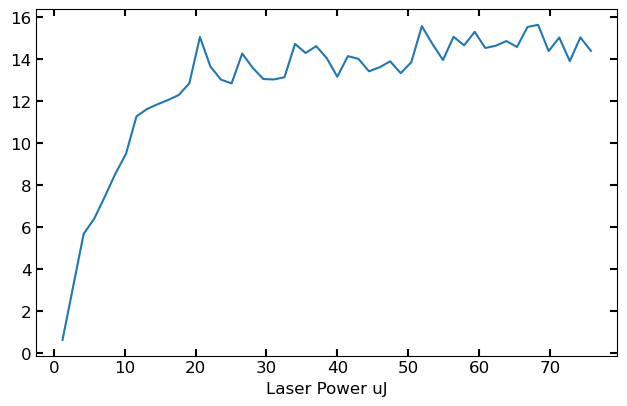

In [5]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
f=XSpect.XSpect_Analysis.spectroscopy_run(xas_experiment,run=17,verbose=True)
xas=XSpect.XSpect_Controller.ScanAnalysis_1D()
analysis=XSpect.XSpect_Analysis.XASAnalysis()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_sum','scan/var0'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix','scan']
xas.set_key_aliases(keys,names)
#xas.
#xas.add_filter('xray','ipm',500.0)
#xas.add_filter('simultaneous','ipm',500.0)
#xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['41']) # 7.5 uJ -0.5 to 2 ps
xas.primary_analysis_loop(xas_experiment)
for f in xas.analyzed_runs:
    laser_on=f.epix_simultaneous_laser_energy_binned
    laser_off=f.epix_xray_not_laser_energy_binned
    norm_on=f.ipm_simultaneous_laser_energy_binned
    norm_off=f.ipm_xray_not_laser_energy_binned
ons=laser_on/norm_on
offs=laser_off/norm_off
#plt.plot(f.scanvar_bins,ons)
#plt.plot(f.scanvar_bins,offs)
plt.plot(f.scanvar_bins,ons-offs)
#plt.plot(f.scanvar_bins,ons-offs)

plt.xlabel('Laser Power uJ')


Obtained shot properties
Key does not exist: Unable to open object (component not found)
HDF5 import of keys completed. Time: 6.25 seconds
Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser
Shots (7165) separated for detector epix on filters: xray and laser into epix_xray_laser
Shots combined for detector ipm on filters: simultaneous and laser into ipm_simultaneous_laser
Shots (7165) separated for detector ipm on filters: xray and laser into ipm_xray_laser
Shots combined for detector scan on filters: simultaneous and laser into scan_simultaneous_laser
Shots (7165) separated for detector scan on filters: xray and laser into scan_xray_laser
Shots combined for detector scanvar_indices on filters: simultaneous and laser into scanvar_indices_simultaneous_laser
Shots (7165) separated for detector scanvar_indices on filters: xray and laser into scanvar_indices_xray_laser
Detector binned in time into key: epix_simultaneous_laser_scanvar_reduced
Det

/lscratch/lbgee/tmp/ipykernel_2133604/4239790782.py:10: RuntimeWarning: invalid value encountered in divide
  det_on=det_on/np.nansum(det_on,axis=1)[:, np.newaxis]
/lscratch/lbgee/tmp/ipykernel_2133604/4239790782.py:12: RuntimeWarning: invalid value encountered in divide
  det_off=det_off/np.nansum(det_off,axis=1)[:, np.newaxis]


Text(0, 0.5, 'Delta XES')

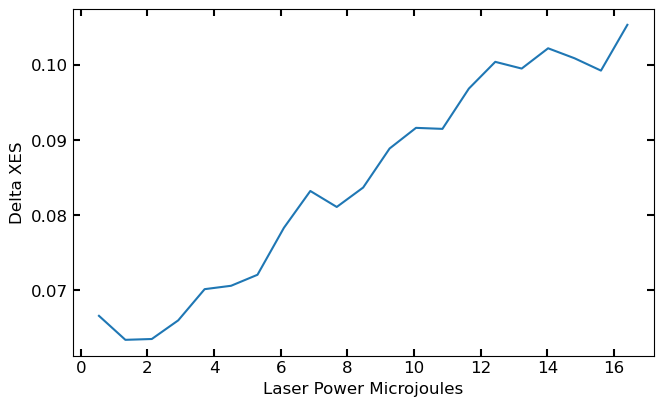

In [6]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=21, hutch='xcs', experiment_id='xcsl1004021')
f=XSpect.XSpect_Analysis.spectroscopy_run(xes_experiment,run=23,verbose=True)
xes=XSpect.XSpect_Controller.ScanAnalysis_1D_XES()
keys=['epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_area','scan/var0'] 
names=['ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix','scan']
xes.set_key_aliases(keys,names)
xes.run_parser(['93']) # 7.5 uJ -0.5 to 2 ps
xes.primary_analysis_loop(xes_experiment)
det_on=np.mean(xes.analyzed_runs[0].epix_simultaneous_laser_scanvar_reduced,axis=2)
det_on=det_on/np.nansum(det_on,axis=1)[:, np.newaxis] 
det_off=np.mean(xes.analyzed_runs[0].epix_xray_not_laser_scanvar_reduced,axis=2)
det_off=det_off/np.nansum(det_off,axis=1)[:, np.newaxis] 
bins=xes.analyzed_runs[0].scanvar_bins
diff=det_on-det_off
diff=diff
plt.plot(bins[:],np.sum(np.abs(diff[:]).T,axis=0))
plt.xlabel('Laser Power Microjoules')
plt.ylabel('Delta XES')


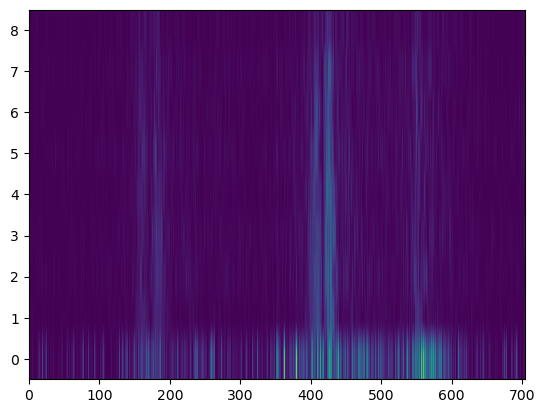

In [3]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
file=h5.File(r'/sdf/home/l/lbgee/links/mfx_experiments/mfx100894224/hdf5/smalldata/mfx100894224_Run0101.h5')
def filter_detector_adu(detector_images,adu_threshold=[3.0]):
    if isinstance(adu_threshold,list):
        detector_images_adu = detector_images * (detector_images > adu_threshold[0])
        detector_images_adu = detector_images * (detector_images < adu_threshold[1])
       
    else:
        detector_images_adu = detector_images * (detector_images > adu_threshold)
    return detector_images_adu
powers=np.array(file['scan/lasmot8'])
power_bins=np.arange(300,500,1)
epix=file['epix100/ROI_area']
laser_on=np.array(file['lightStatus/laser'])
epix_laser_on=np.array(epix)[laser_on]
epix_laser_off=np.array(epix)[~laser_on]

binned_epix_laser_on = np.digitize(powers[laser_on], power_bins)

# Bin epix_laser_off based on powers
binned_epix_laser_off = np.digitize(powers[~laser_on], power_bins)
# Fetch data
powers = np.array(file['scan/lasmot8'])
epix = np.array(file['epix100/ROI_area'])
epix=filter_detector_adu(epix,2)
laser_on = np.array(file['lightStatus/laser'])

# Split epix data based on laser status
epix_summed= np.nansum(epix,axis=2)
epix_laser_on = np.nansum(epix[laser_on],axis=2)
epix_laser_off = np.nansum(epix[~laser_on],axis=2)

# Define power bins
power_bins = np.linspace(500, 300, 9)

# Digitize powers for laser on and laser off
binned_powers=np.digitize(powers, power_bins)
sum_epix_laser_on = np.zeros([(np.shape(power_bins)[0] + 0) , epix.shape[1]], dtype=epix.dtype)
sum_epix_laser_off = np.zeros([(np.shape(power_bins)[0] + 0) , epix.shape[1]], dtype=epix.dtype)
for idx,i in enumerate( binned_powers):
    #if idx ==9:
     #   break
    if laser_on[idx]:
        sum_epix_laser_on[binned_powers[idx]] =sum_epix_laser_on[binned_powers[idx],:]+ epix_summed[idx,:]
    else:
        sum_epix_laser_off[binned_powers[idx]] =sum_epix_laser_off[binned_powers[idx]]+ epix_summed[idx]

# Assuming sum_epix_laser_on and sum_epix_laser_off are numpy arrays of shape (200, 704)
sum_epix_laser_on_normalizers = np.trapz(sum_epix_laser_on, axis=1)[:, np.newaxis]  # Shape becomes (200, 1)
sum_epix_laser_off_normalizers = np.trapz(sum_epix_laser_off, axis=1)[:, np.newaxis]  # Shape becomes (200, 1)

# Perform element-wise division
sum_epix_laser_on_norm = sum_epix_laser_on / sum_epix_laser_on_normalizers
sum_epix_laser_off_norm = sum_epix_laser_off / sum_epix_laser_off_normalizers
sum_epix_laser_on_norm  = np.nan_to_num(sum_epix_laser_on_norm , nan=0.0)
sum_epix_laser_off_norm  = np.nan_to_num(sum_epix_laser_off_norm , nan=0.0)



diff=np.abs(sum_epix_laser_on_norm-sum_epix_laser_off_norm)
plt.imshow(diff,origin='lower',aspect='auto')


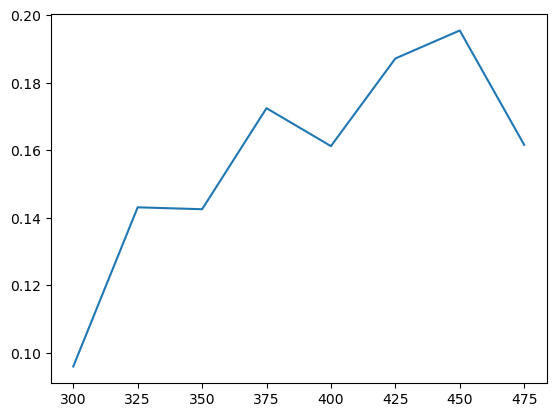

In [16]:
plt.plot(power_bins[1:],np.nansum(diff[1:],axis=1))

In [15]:
np.nansum(diff[1:],axis=1)

array([0.16159204, 0.1954715 , 0.18717178, 0.16121241, 0.17244806,
       0.14251882, 0.14308163, 0.09593037])